# 手动实现经典NLP模型算法——Attention

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.sequence import load_data, get_vocab
from attention.attention_seq2seq import AttentionSeq2seq
from common.optimizer import Adam
from common.utils import Trainer, eval_seq2seq

## Ⅰ、加载日期序列数据集

In [ ]:
(x_train, t_train), (x_test, t_test) = load_data('date.txt')
char_to_id, id_to_char = get_vocab()

print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)

print(x_train[0])
print(t_train[0])

print(''.join([id_to_char[c] for c in x_train[0]]))
print(''.join([id_to_char[c] for c in t_train[0]]))

(45000, 29) (45000, 11)
(5000, 29) (5000, 11)
[ 8 22  9 22  9  8  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7]
[14 11 12  9  8 15 16  8 15 16  9]
2/7/72                       
_1972-02-07


## Ⅱ、创建带有注意力层的Seq2seq网络模型

In [ ]:
# 定义超参数
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256
batch_size = 128
max_epoch = 10
max_grad = 5.0

In [ ]:
# 反转输入
is_reverse = True
if is_reverse:
  x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

In [ ]:
# 定义模型
model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

## Ⅲ、模型训练并评估

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 4.08
| epoch 1 |  iter 21 / 351 | time 19[s] | loss 3.09
| epoch 1 |  iter 41 / 351 | time 33[s] | loss 1.90
| epoch 1 |  iter 61 / 351 | time 47[s] | loss 1.72
| epoch 1 |  iter 81 / 351 | time 56[s] | loss 1.46
| epoch 1 |  iter 101 / 351 | time 71[s] | loss 1.19
| epoch 1 |  iter 121 / 351 | time 88[s] | loss 1.14
| epoch 1 |  iter 141 / 351 | time 101[s] | loss 1.09
| epoch 1 |  iter 161 / 351 | time 118[s] | loss 1.06
| epoch 1 |  iter 181 / 351 | time 131[s] | loss 1.04
| epoch 1 |  iter 201 / 351 | time 144[s] | loss 1.03
| epoch 1 |  iter 221 / 351 | time 158[s] | loss 1.02
| epoch 1 |  iter 241 / 351 | time 173[s] | loss 1.02
| epoch 1 |  iter 261 / 351 | time 186[s] | loss 1.01
| epoch 1 |  iter 281 / 351 | time 197[s] | loss 1.00
| epoch 1 |  iter 301 / 351 | time 210[s] | loss 1.00
| epoch 1 |  iter 321 / 351 | time 224[s] | loss 1.00
| epoch 1 |  iter 341 / 351 | time 237[s] | loss 1.00
Q 10/15/94                     
T 1994-10-

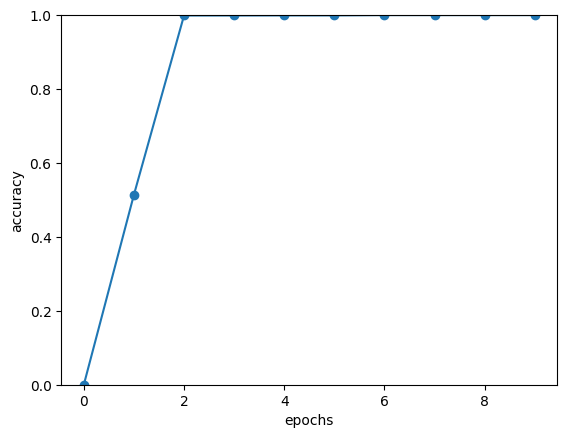

In [ ]:
acc_list = []
for epoch in range(max_epoch):
  trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)

  correct_num = 0
  for i in range(len(x_test)):
    question, correct = x_test[[i]], t_test[[i]]
    verbose = i < 10
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose, is_reverse)

  acc = float(correct_num) / len(x_test)
  acc_list.append(acc)
  print('val acc %.3f%%' % (acc * 100))

x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()

## Ⅳ、注意力层可视化

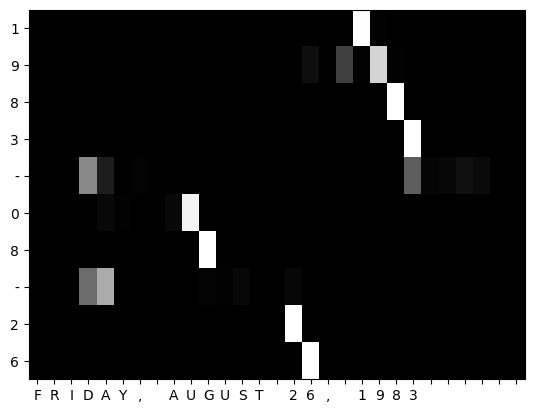

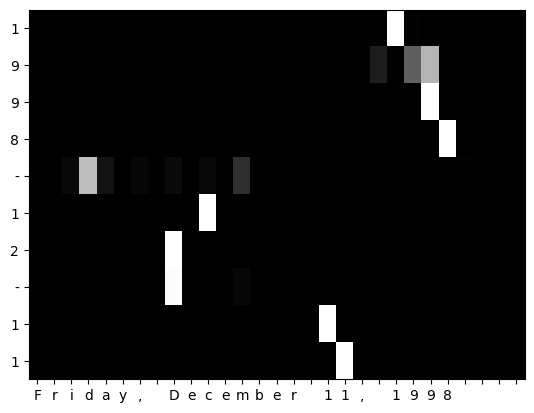

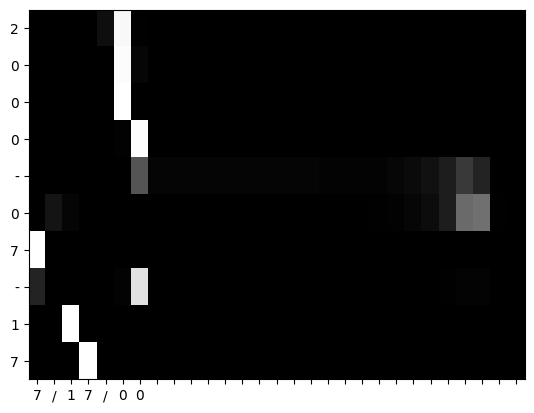

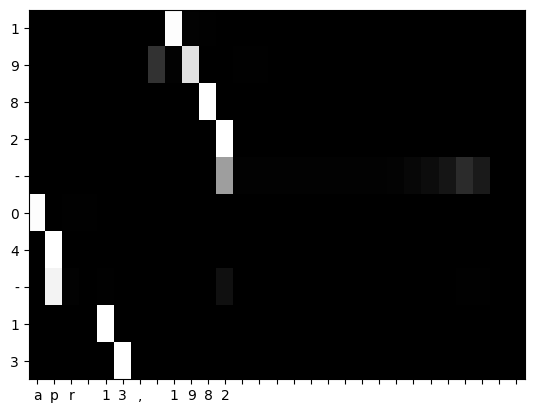

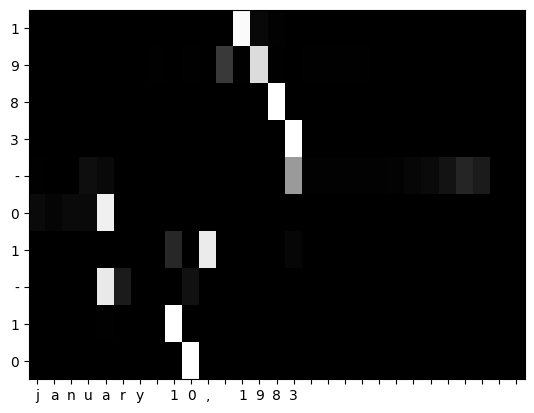

In [8]:
_idx = 0
def visualize(attention_map, row_labels, column_labels):
  fig, ax = plt.subplots()
  ax.pcolor(attention_map, cmap=plt.cm.Greys_r, vmin=0.0, vmax=1.0)

  ax.patch.set_facecolor('black')
  ax.set_yticks(np.arange(attention_map.shape[0])+0.5, minor=False)
  ax.set_xticks(np.arange(attention_map.shape[1])+0.5, minor=False)
  ax.invert_yaxis()
  ax.set_xticklabels(row_labels, minor=False)
  ax.set_yticklabels(column_labels, minor=False)

  global _idx
  _idx += 1
  plt.show()


np.random.seed(1984)
for _ in range(5):
  idx = [np.random.randint(0, len(x_test))]
  x = x_test[idx]
  t = t_test[idx]

  model.forward(x, t)
  d = model.decoder.attention.attention_weights
  d = np.array(d)
  attention_map = d.reshape(d.shape[0], d.shape[2])

  # reverse for print
  attention_map = attention_map[:,::-1]
  x = x[:,::-1]

  row_labels = [id_to_char[i] for i in x[0]]
  column_labels = [id_to_char[i] for i in t[0]]
  column_labels = column_labels[1:]

  visualize(attention_map, row_labels, column_labels)
